In [48]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [32]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [4]:
#loading data
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(256,256),
    batch_size=32
                                                   
                                                   )

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [6]:
len(dataset)

68

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]


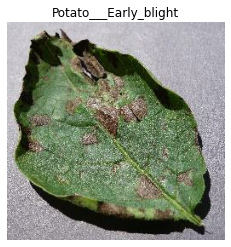

In [8]:
 #lets visualize the images
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    plt.show()
    

In [9]:
len(dataset)

68

In [10]:
#80% training,10% for validation, 10% for test
#if i do dataset.take(10) it would take first 10 elements of dataset

train_ds=dataset.take(54)
test_ds=dataset.skip(54) #takes all the elements after 54 elements

In [11]:
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
test_ds=test_ds.skip(6)
print(len(val_ds))
print(len(test_ds))

6
8


In [17]:
def get_datasets_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    test_ds=ds.skip(train_size)
    val_ds=test_ds.take(val_size)
    test_ds=test_ds.skip(val_size)
    
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds=get_datasets_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
#this will improve the speedness of the array

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

# BUILDING MODEL  

In [28]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model=models.Sequential([
    
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(3,activation="softmax")
])

model.build(input_shape=input_shape)

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_2 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (32, 60, 60, 64)         

In [30]:
model.compile(

    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [33]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
    

    
)

Epoch 1/50
54/54 [==============================] - 31s 212ms/step - loss: 0.9192 - accuracy: 0.4931 - val_loss: 0.8789 - val_accuracy: 0.5260
Epoch 2/50
54/54 [==============================] - 7s 132ms/step - loss: 0.8104 - accuracy: 0.5822 - val_loss: 0.6619 - val_accuracy: 0.6823
Epoch 3/50
54/54 [==============================] - 7s 129ms/step - loss: 0.5713 - accuracy: 0.7413 - val_loss: 0.5038 - val_accuracy: 0.7812
Epoch 4/50
54/54 [==============================] - 7s 133ms/step - loss: 0.4683 - accuracy: 0.7963 - val_loss: 0.3579 - val_accuracy: 0.8542
Epoch 5/50
54/54 [==============================] - 7s 131ms/step - loss: 0.3284 - accuracy: 0.8698 - val_loss: 0.3339 - val_accuracy: 0.8698
Epoch 6/50
54/54 [==============================] - 7s 133ms/step - loss: 0.2960 - accuracy: 0.8791 - val_loss: 0.2553 - val_accuracy: 0.8750
Epoch 7/50
54/54 [==============================] - 7s 134ms/step - loss: 0.2441 - accuracy: 0.9103 - val_loss: 0.2455 - val_accuracy: 0.9010
Epoch

In [36]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 1s 50ms/step - loss: 0.0414 - accuracy: 0.9844


In [37]:
print(f" loss:{scores[0]}")

 loss:0.04138035327196121


In [38]:
history

In [39]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
history.history["loss"]

[0.919232189655304,
 0.8103997707366943,
 0.5713377594947815,
 0.4683176279067993,
 0.3283748924732208,
 0.29601365327835083,
 0.24407567083835602,
 0.209318146109581,
 0.16162703931331635,
 0.13903702795505524,
 0.1616678535938263,
 0.14712642133235931,
 0.11665088683366776,
 0.11343824118375778,
 0.06636732816696167,
 0.048401013016700745,
 0.08031552284955978,
 0.0762067511677742,
 0.08086542785167694,
 0.07382805645465851,
 0.046012479811906815,
 0.04015722498297691,
 0.024839891120791435,
 0.04925031587481499,
 0.04448913037776947,
 0.029890963807702065,
 0.07453963160514832,
 0.030181217938661575,
 0.05102987959980965,
 0.022875763475894928,
 0.02738845720887184,
 0.01233749557286501,
 0.03427748382091522,
 0.020672770217061043,
 0.03536504879593849,
 0.03196549043059349,
 0.019642017781734467,
 0.014248492196202278,
 0.042123302817344666,
 0.01960158161818981,
 0.020077509805560112,
 0.015607564710080624,
 0.0395788848400116,
 0.03539305552840233,
 0.02444310672581196,
 0.035930

In [42]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

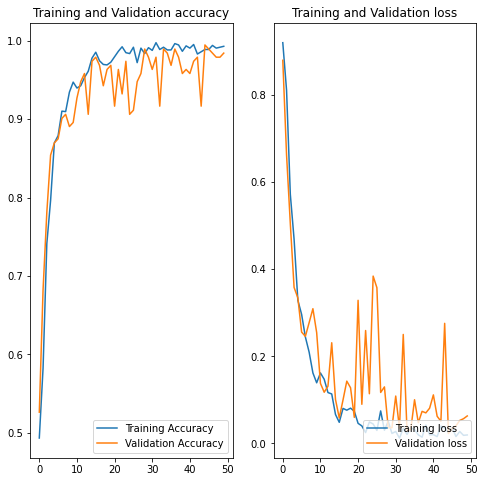

In [44]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training loss")
plt.plot(range(EPOCHS),val_loss,label="Validation loss")
plt.legend(loc="lower right")
plt.title("Training and Validation loss")
plt.show()

first image to predict
actual_label: Potato___Late_blight
predicted_label Potato___Late_blight


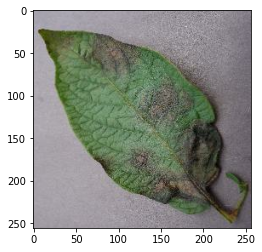

In [51]:
for imgs_batch,labels_batch in test_ds.take(1):
    
    first_img=imgs_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_img)
    
    print("actual_label:",class_names[first_label])
    batch_pred=model.predict(imgs_batch)
    
    print("predicted_label",class_names[np.argmax(batch_pred[0])])

In [62]:
def predict(model,img):
    
    #img_array=tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array=tf.expand_dims(img,0)
    pred=model.predict(img_array)
    pred_class=class_names[np.argmax(pred[0])]
    confidence=round(100*(np.max(pred[0])),2)
    
    return pred_class,confidence
    

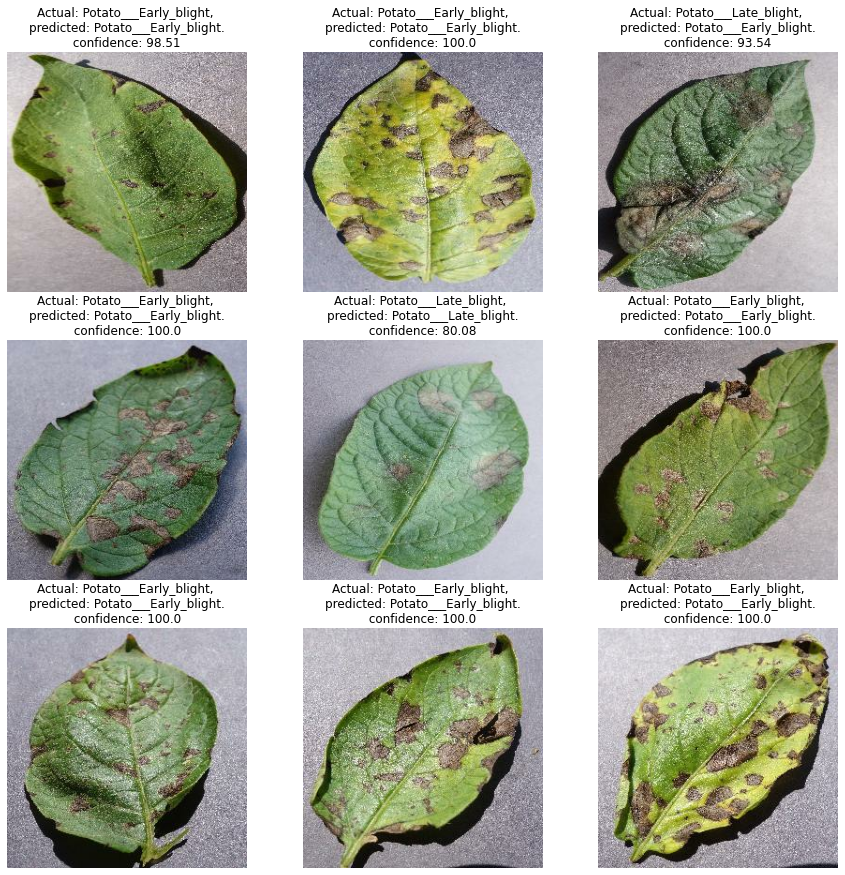

In [66]:
plt.figure(figsize=(15,15))
for imgs,labels in test_ds.take(1):
    
    for i in range(9):
        
        ax=plt.subplot(3,3,i+1)
        plt.imshow(imgs[i].numpy().astype("uint8"))
        
        
        predicted_class, confidence=predict(model,imgs[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \npredicted: {predicted_class}.\n confidence: {confidence} ")
        
        plt.axis("off")

In [68]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets
